In [1]:
"""
https://www.tensorflow.org/tutorials/quickstart/beginner
https://www.tensorflow.org/tutorials/keras/classification
"""

import json
import subprocess
from datetime import datetime

import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from dj_config.settings import BASE_DIR

2024-02-09 01:31:26.429187: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 01:31:26.457413: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 01:31:26.457441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 01:31:26.458465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-09 01:31:26.463406: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 01:31:26.463772: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
"""Verify the installation"""

print(f"tf = {tf.__version__} | tfds = {tfds.__version__}")
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices("GPU"))

tf = 2.15.0 | tfds = 4.9.4
tf.Tensor(-996.95, shape=(), dtype=float32)
[]


2024-02-09 01:31:28.645155: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-09 01:31:28.645822: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
"""Load mnist data"""

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"{x_train.shape =} | {y_train.shape = }")
print(f"{x_test.shape =} | {y_test.shape = }")

x_train.shape =(60000, 28, 28) | y_train.shape = (60000,)
x_test.shape =(10000, 28, 28) | y_test.shape = (10000,)


In [4]:
print(f"{x_train[0].shape = }")
print(f"X[0] data =")
x_train[0]

x_train[0].shape = (28, 28)
X[0] data =


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
print(f"{y_train[0].shape = }")
print(f"Y[0] data (label) =")
y_train[0]

y_train[0].shape = ()
Y[0] data (label) =


5

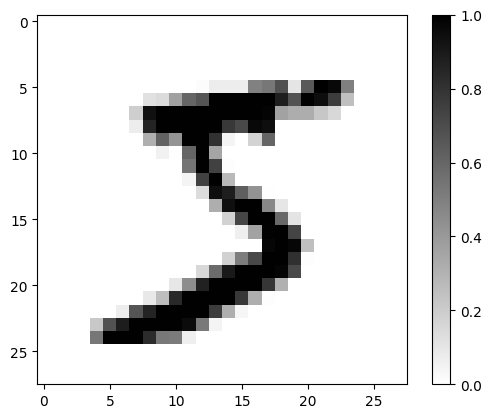

In [6]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

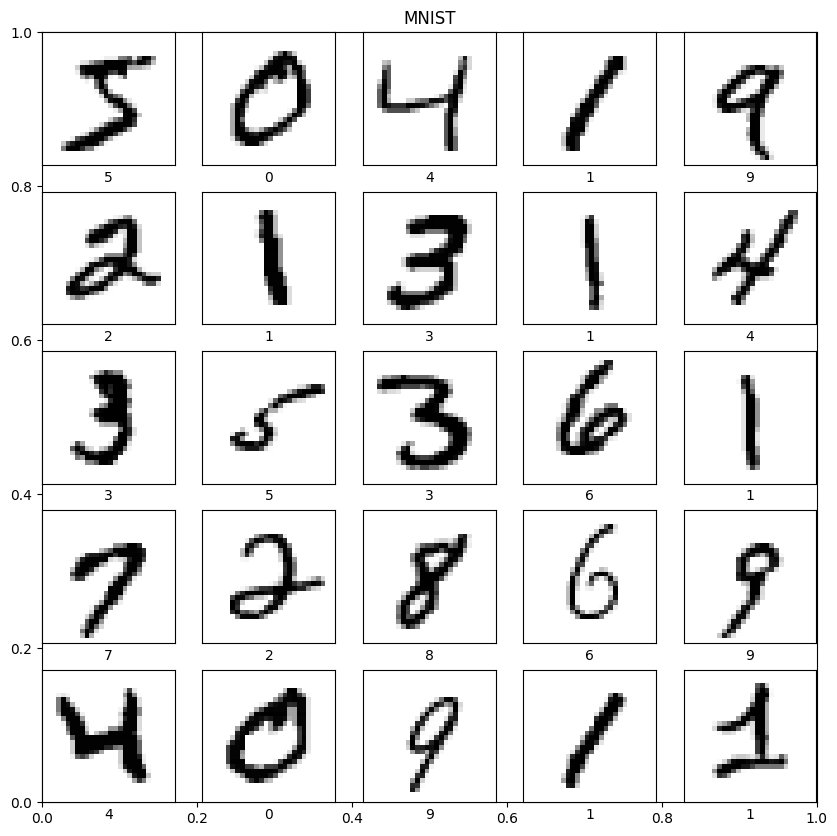

In [7]:
plt.figure(figsize=(10, 10))
plt.title("MNIST")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [8]:
"""---------------mnist_corrupted----------------"""

'---------------mnist_corrupted----------------'

In [9]:
"""https://www.tensorflow.org/datasets/catalog/overview"""

# tfds.list_builders()

'https://www.tensorflow.org/datasets/catalog/overview'

In [10]:
(x_train_c, y_train_c), (x_test_c, y_test_c) = tfds.as_numpy(
    tfds.load(
        "mnist_corrupted",
        split=["train", "test"],
        batch_size=-1,
        shuffle_files=True,
        as_supervised=True,
    )
)

print(f"{x_train_c.shape =} | {y_train_c.shape = }")
print(f"{x_test_c.shape =} | {y_test_c.shape = }")

x_train_c.shape =(60000, 28, 28, 1) | y_train_c.shape = (60000,)
x_test_c.shape =(10000, 28, 28, 1) | y_test_c.shape = (10000,)


In [11]:
x_train_c[:, :, :, 0].shape

(60000, 28, 28)

In [12]:
x_train_c = x_train_c[:, :, :, 0]
x_test_c = x_test_c[:, :, :, 0]

In [13]:
x_train_c, x_test_c = x_train_c / 255.0, x_test_c / 255.0

print(f"{x_train_c.shape =} | {y_train_c.shape = }")
print(f"{x_test_c.shape =} | {y_test_c.shape = }")

x_train_c.shape =(60000, 28, 28) | y_train_c.shape = (60000,)
x_test_c.shape =(10000, 28, 28) | y_test_c.shape = (10000,)


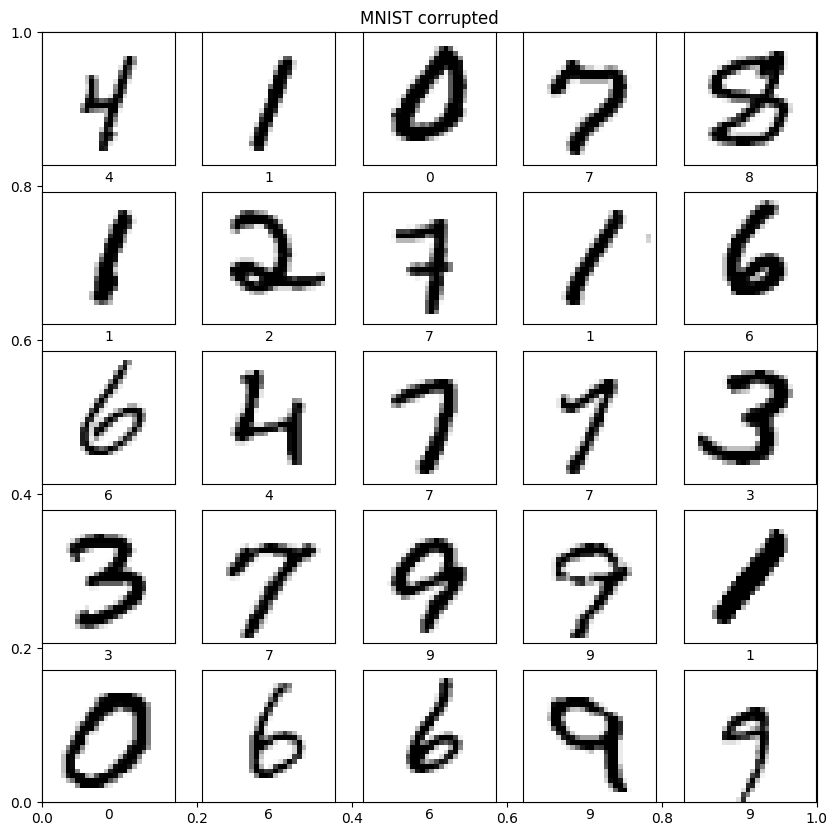

In [14]:
plt.figure(figsize=(10, 10))
plt.title("MNIST corrupted")
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_c[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_c[i])
plt.show()

In [15]:
"""Build a tf.keras.Sequential model:"""

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10),
    ]
)

In [16]:
"""For each example, the model returns a vector of logits or log-odds scores, one for each class."""

predictions = model(x_train[:1]).numpy()
predictions

array([[-0.40499842,  0.01374812,  0.09864856,  0.24106711, -0.4045596 ,
        -0.70414424,  0.08325027,  0.29970005,  0.32308835, -0.16470556]],
      dtype=float32)

In [17]:
"""The tf.nn.softmax function converts these logits to probabilities for each class:"""

tf.nn.softmax(predictions).numpy()

array([[0.06747574, 0.10256683, 0.11165514, 0.12874497, 0.06750535,
        0.05002997, 0.10994902, 0.13651937, 0.13974996, 0.0858036 ]],
      dtype=float32)

In [18]:
"""Define a loss function for training"""

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
"""This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3."""

loss_fn(y_train[:1], predictions).numpy()

2.995133

In [20]:
"""configure and compile the model"""

model.compile(
    optimizer="adam",
    loss=loss_fn,
    metrics=["accuracy"],
)

In [21]:
"""combine 2 mnist datasets"""

x_train_combo = np.concatenate([x_train, x_train_c])
y_train_combo = np.concatenate([y_train, y_train_c])
print(f"{x_train_combo.shape = } | {y_train_combo.shape = }")

x_test_combo = np.concatenate([x_test, x_test_c])
y_test_combo = np.concatenate([y_test, y_test_c])
print(f"{x_test_combo.shape = } | {y_test_combo.shape = }")

x_train_combo.shape = (120000, 28, 28) | y_train_combo.shape = (120000,)
x_test_combo.shape = (20000, 28, 28) | y_test_combo.shape = (20000,)


In [22]:
"""Train and evaluate your model"""

history = model.fit(
    x_train_combo,
    y_train_combo,
    validation_data=(x_test_combo, y_test_combo),
    epochs=3,
    shuffle=True,
    use_multiprocessing=True,
)

Epoch 1/3
3750/3750 [==============================] - 5s 1ms/step - loss: 0.2144 - accuracy: 0.9367 - val_loss: 0.0983 - val_accuracy: 0.9702
Epoch 2/3
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0933 - accuracy: 0.9713 - val_loss: 0.0805 - val_accuracy: 0.9766
Epoch 3/3
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0690 - accuracy: 0.9777 - val_loss: 0.0685 - val_accuracy: 0.9790


In [23]:
"""compare how the model performs on the test dataset"""

test_loss, test_acc = model.evaluate(x_test_combo, y_test_combo, verbose=2)
print(f"Test accuracy: {test_acc}")

625/625 - 0s - loss: 0.0685 - accuracy: 0.9790 - 323ms/epoch - 516us/step
Test accuracy: 0.9789999723434448


In [24]:
"""model.fit() returns a History object that contains a dictionary with everything that happened during training:"""

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

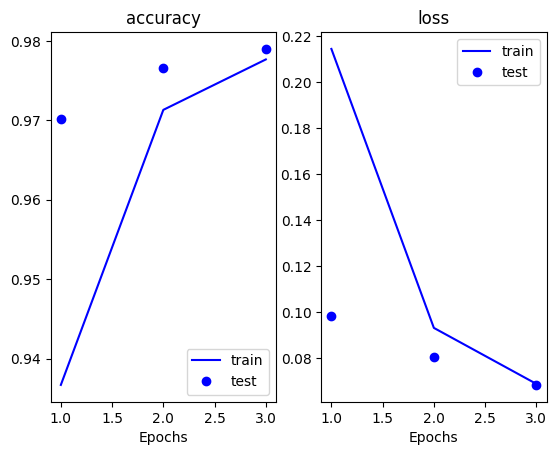

In [25]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

plt.subplot(121)
plt.plot(epochs, acc, "b", label="train")
plt.plot(epochs, val_acc, "bo", label="test")
plt.title("accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss, "b", label="train")
plt.plot(epochs, val_loss, "bo", label="test")
plt.title("loss")
plt.xlabel("Epochs")
plt.legend()

plt.show()

In [26]:
"""
Make predictions.
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.
"""

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(x_test_combo)

625/625 [==============================] - 0s 548us/step


In [28]:
"""Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:"""

predictions[0]

array([4.0342778e-09, 6.9161894e-09, 1.1112272e-06, 1.0706853e-05,
       1.4022777e-11, 4.3453365e-09, 1.1353121e-13, 9.9998778e-01,
       2.6386107e-07, 1.1089568e-07], dtype=float32)

In [29]:
y_test_combo[110]

8

In [30]:
"""Define functions to graph the full set of 10 class predictions."""


def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label, 100 * np.max(predictions_array), true_label
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

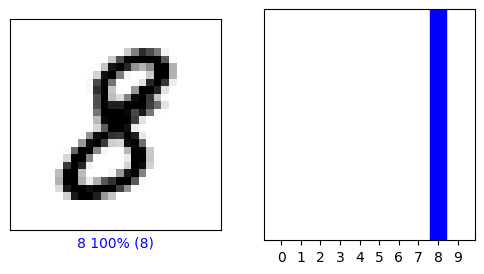

In [31]:
"""Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label."""

i = 110
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test_combo, x_test_combo)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test_combo)
plt.show()

In [32]:
np.count_nonzero(x_test_combo[i])

176

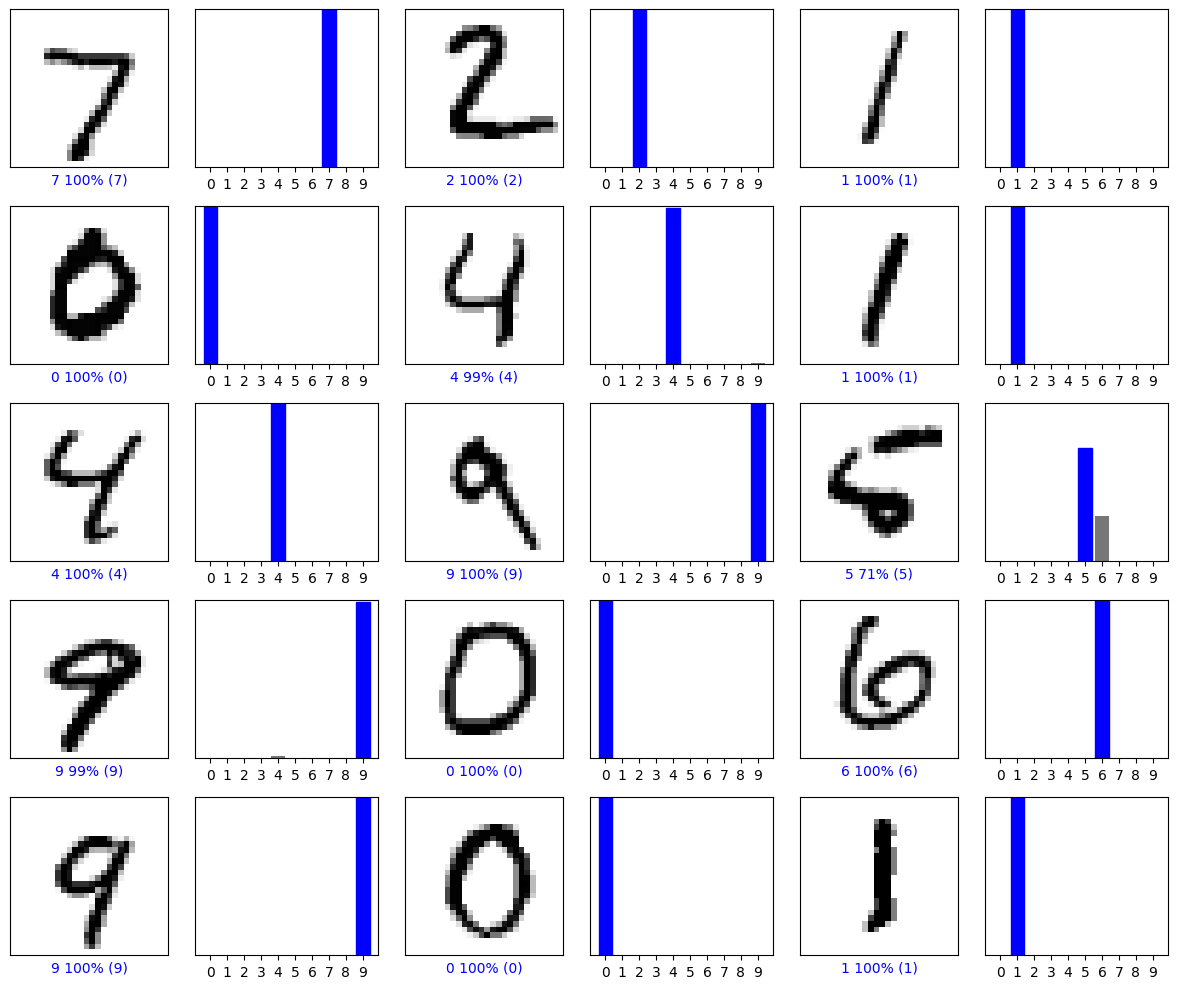

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test_combo, x_test_combo)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], y_test_combo)
plt.tight_layout()
plt.show()

In [34]:
"""-----------------------------"""

'-----------------------------'

In [35]:
"""Mine"""

'Mine'

In [36]:
target_for_tf_1 = [
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        7.592670602710077e-09,
        1.9481243276956098e-05,
        0.014016933992255834,
        0.049336592875811436,
        0.017238754128685713,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        6.527173822306993e-05,
        0.04162684273848677,
        0.6025610924764644,
        0.8100857973439237,
        0.28358336134902284,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        5.314869421897051e-08,
        0.00038308128226166826,
        0.16342207787738539,
        0.777862530207842,
        0.9824530659987186,
        0.999267618663881,
        0.3498726672363875,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        7.559520227379054e-05,
        0.32613452590118625,
        0.9258878277753216,
        0.9106503423785388,
        0.5064278843018711,
        0.999059567636531,
        0.3498726672363875,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0009567077065272112,
        0.7447616253338589,
        0.7655429831738055,
        0.1560505066113046,
        0.37373577544068015,
        0.9990021330824994,
        0.34987266723638755,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        7.068776331123129e-07,
        0.06806532884763035,
        0.0013138915296239042,
        0.0002301636254327887,
        0.38712447306264175,
        0.99900801509414,
        0.3498726672363875,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        6.257958711431817e-05,
        2.0500210627317438e-07,
        0.00021962647771007714,
        0.3871366320146702,
        0.9990080204090093,
        0.3498726672363875,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00021962647771007714,
        0.38713663201467025,
        0.9990080204090094,
        0.3498726672363875,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00021962647771007717,
        0.38713663201467025,
        0.9990080204090093,
        0.34987266723638755,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00021962647771007717,
        0.38713663201467025,
        0.9990080204090093,
        0.3498726672363875,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00021962647771007714,
        0.38713663201467025,
        0.9990080204090093,
        0.3498726672363875,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00021962647771007714,
        0.38713663201467025,
        0.9990080204090094,
        0.34987266723638755,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00021962647771007714,
        0.38713663201467025,
        0.9990080204090094,
        0.3498726672363875,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00021962647771007714,
        0.3871366320146702,
        0.9990080204090093,
        0.3498726672363875,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00021959231069236494,
        0.38707658052697425,
        0.9988532147198266,
        0.3498182387403885,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00014112011592105352,
        0.24915316477959745,
        0.6433012527211652,
        0.22481102170600648,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.7083508856097797e-07,
        0.00030200620026666464,
        0.0007801158942323857,
        0.00027215007266585996,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
]

In [37]:
target_for_tf_8 = [
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.2148272964336117e-07,
        0.00011595459513470905,
        0.001506397991154112,
        0.016118053210687485,
        0.014989405022513138,
        0.000594322405373183,
        7.212686540993876e-05,
        6.719513483398472e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        9.301021488319898e-08,
        0.0009134966065988615,
        0.26562118731339357,
        0.6413071863103195,
        0.7446925166596603,
        0.742403685136618,
        0.5865252319607358,
        0.16656052915188685,
        0.0005319976918288104,
        1.1389005904065145e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        8.200084250926909e-08,
        0.0005246841272190279,
        0.5320622541035881,
        0.9942089237352129,
        0.8779665072733606,
        0.7709765521828236,
        0.7828529281053618,
        0.9229796540441646,
        0.9980888369724098,
        0.3692080936602129,
        0.00024914581049910917,
        3.0370682410839744e-09,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0001131079282466586,
        0.12269597386493752,
        0.9732549316879422,
        0.7849180096170425,
        0.10101805807919921,
        0.029342693118302857,
        0.03532615142164383,
        0.18275287061302026,
        0.9812836954569872,
        0.9092240398603064,
        0.007508877980881444,
        4.326103687522805e-06,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0003584100492640974,
        0.38448354611938707,
        0.9986741871738698,
        0.3434341380712003,
        0.0002740859937825799,
        0.0,
        0.0,
        0.0007187470683216843,
        0.6507667100105626,
        0.9985575460364986,
        0.13604304380389723,
        9.780093524517069e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0002998532386467238,
        0.3220225297593192,
        0.9987009844743772,
        0.424207378116684,
        0.0003640104228307901,
        0.0,
        0.0,
        0.0008675033274771132,
        0.7247810673897513,
        0.9937576781368456,
        0.058860500434920644,
        4.1554094647721256e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        2.534389360749873e-05,
        0.028486007529016682,
        0.8561302366447066,
        0.8947026821703631,
        0.23366240299052687,
        0.000901480991230709,
        0.0011168901601949172,
        0.3632862158397415,
        0.9935870272072405,
        0.6185877284802584,
        0.0007418527426464599,
        3.872262007382168e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.817685342288805e-06,
        0.25248079030808657,
        0.9162059598935817,
        0.9930784479264214,
        0.6387868149614688,
        0.6901992369791539,
        0.9666536899629867,
        0.7176131969989856,
        0.05884266527063934,
        4.236710196312256e-07,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.9930760332114112e-07,
        0.0012283612636085908,
        0.39770043921995635,
        0.9689363120415745,
        0.9988629214392724,
        0.9995018376642888,
        0.8605901420889258,
        0.1519661750674498,
        0.0005091997904209626,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        7.629524650336045e-06,
        0.008726659283306057,
        0.5617887933857324,
        0.9821829136837222,
        0.7204041161254829,
        0.312950646106208,
        0.5959991323679685,
        0.8971488986902665,
        0.9867315494048792,
        0.36531321017269425,
        0.0004547747111236784,
        1.1085299079956706e-07,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00042718934634570946,
        0.4477583281358252,
        0.98610191371883,
        0.518068675372891,
        0.02949102770181083,
        0.0001457776396803843,
        0.002780628311610257,
        0.14099442493993847,
        0.876877321620875,
        0.9629559844371658,
        0.21152825545669166,
        0.00015290756660506208,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.02464858311425122,
        0.9506189780020537,
        0.8729470743635479,
        0.009640527818082235,
        5.9665600417814e-06,
        0.0,
        0.0,
        0.00017839420241989192,
        0.11882838057398128,
        0.9758603359667263,
        0.672026709241897,
        0.0004884781745250307,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0679274358963383,
        0.9981459826901282,
        0.7666384618933226,
        0.0011064418368531938,
        0.0,
        0.0,
        0.0,
        1.435014743912206e-07,
        0.001973182480568267,
        0.9286449808411512,
        0.7816411993259479,
        0.0005683759530725434,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.01092377602063961,
        0.8623346606368678,
        0.9489267106739581,
        0.17264628813002408,
        0.00044499856874739385,
        3.0370682410840437e-07,
        2.1370849103001635e-05,
        0.0008927647356650859,
        0.3828115442982499,
        0.9951912950237309,
        0.5200475710534479,
        0.0003777010961424545,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00020758889853518425,
        0.22341074191477786,
        0.9589328405776429,
        0.929038666071074,
        0.3647572906233648,
        0.13962052188210983,
        0.1563212294629821,
        0.5128076102421748,
        0.998525764287892,
        0.8617359750301109,
        0.0364980974081719,
        2.555117351495252e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.5033487793366002e-07,
        0.00041088889746879697,
        0.28189271893764745,
        0.7760102642771363,
        0.9892199649717252,
        0.9883163493223306,
        0.9927723313564495,
        0.9632215130216966,
        0.6437536707173392,
        0.14684733832258504,
        0.00010559082512671756,
        1.8222409446504148e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00015769416576463962,
        0.0023128638127813896,
        0.08766691377721006,
        0.1936617030569315,
        0.18485933074905833,
        0.05101390483404802,
        0.0007806549738451781,
        3.2058551455683625e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        5.434203956513178e-07,
        3.76491144211379e-05,
        8.397256483808782e-05,
        8.012490927455385e-05,
        2.165237730086924e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
]

In [38]:
target_for_tf_5 = [
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.0277153692577782e-05,
        0.010992558071977505,
        0.013870977097939855,
        0.013873649782795087,
        0.013873649782795086,
        0.013873649782795087,
        0.013873649782795087,
        0.013868794305152529,
        0.008664236311903823,
        8.094360905249336e-06,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0006049174567342404,
        0.646860192509023,
        0.7401862795656131,
        0.7402723415883281,
        0.7402723415883281,
        0.7402723415883281,
        0.7402723415883281,
        0.7400148562736741,
        0.4640079386800107,
        0.00043349416479537644,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.005258663856068133,
        0.9698638812510145,
        0.9612512505440056,
        0.8481101172607496,
        0.8479525009198586,
        0.8479525009198586,
        0.8479525009198586,
        0.8476573243514618,
        0.5312494074230616,
        0.000496312921033681,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.04624879742396089,
        0.9980405128532891,
        0.7308622205204267,
        0.06898548989057544,
        0.06812369887361842,
        0.06812369887361842,
        0.06812369887361841,
        0.06809985426762998,
        0.0425409783495748,
        3.9742908148386495e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.099231423246082,
        0.9983223057120186,
        0.6411881502714087,
        0.0006954838460819105,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.15364886710252354,
        0.9985992525290059,
        0.5674398947107104,
        0.0004538947206008259,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.20735542325877637,
        0.9988725814236534,
        0.4983009484747238,
        0.08089744731440376,
        0.1342827344762742,
        0.09665277112101006,
        0.008213650881150648,
        0.00037545430517002705,
        1.488163438131177e-07,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.25564220335675525,
        0.9989345033206795,
        0.9873792949958432,
        0.9981031124511045,
        0.9983051500586743,
        0.9981689654681327,
        0.8944021304341703,
        0.39459832630639907,
        0.028234758620919426,
        4.07344609236251e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.07676351655177997,
        0.5761168978467572,
        0.5330174436355164,
        0.4194843864187061,
        0.3948521380602035,
        0.5368865425555622,
        0.9051763575951287,
        0.9846590163159825,
        0.7116590560017821,
        0.034527837545180434,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        8.424642076467203e-06,
        0.0006332142096747447,
        0.0005384787151744676,
        0.0002903251019091036,
        0.00023648932372661213,
        0.0005833935005100426,
        0.05255282842136119,
        0.7820881377005493,
        0.9992549608733938,
        0.31062072081773073,
        1.064290559612564e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.594460826569116e-08,
        6.454224245964318e-05,
        0.36953286766869936,
        0.9996154091800138,
        0.5000197120373969,
        0.00024349858212671581,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        6.83340354243907e-09,
        0.3002870120828886,
        0.9993454480242772,
        0.5309128669786564,
        0.00033428852561815997,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        8.819675767310855e-06,
        0.3945550961621157,
        0.9997250500701786,
        0.4254028725900302,
        4.430796614039184e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00019245740610063675,
        0.1731305364008816,
        0.04185475026733291,
        0.0008297205271153601,
        0.0004924775736246008,
        0.0004576708951846741,
        0.0008804662383789727,
        0.17234621850026513,
        0.8361848601346924,
        0.9957832192843914,
        0.17315599353660496,
        4.1000421254634755e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0004304853394519472,
        0.5595004730983876,
        0.9843209436448366,
        0.6877707956843813,
        0.4822361803665174,
        0.45835909259204705,
        0.6634443506059156,
        0.9766838008023006,
        0.9559649130745647,
        0.3804986923038174,
        0.000508375226393508,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00010915918028808996,
        0.20629328096116015,
        0.652145199974318,
        0.8916217890758857,
        0.9979789490056201,
        0.9960241452165014,
        0.9098847511523162,
        0.6361630651507866,
        0.22663897535818703,
        0.0005055448288092393,
        2.5739153343187357e-07,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00011039977265909802,
        0.0007988508829325798,
        0.001329660806389079,
        0.011151007528558266,
        0.017096094548497285,
        0.0013756941618509964,
        0.0007639876390966628,
        5.649945677648348e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        3.03706824108405e-09,
        4.194370852565914e-06,
        6.794925337070939e-06,
        5.694502952032703e-09,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
]

In [39]:
target_for_tf_6 = [
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        5.922283070113861e-08,
        7.025580668886056e-05,
        0.0027272473393294035,
        0.03533090136996696,
        0.05672048034286618,
        0.054213420196101425,
        0.02511310925385467,
        2.3441270365410186e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0004780567551584674,
        0.159816337270697,
        0.6197644751584344,
        0.7828104207037194,
        0.825245268573449,
        0.8201290469461908,
        0.6191030018482112,
        0.0005787486694712353,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.45779275572034e-07,
        0.00044022026165493753,
        0.3763966947794378,
        0.9735021471731767,
        0.9164482075550773,
        0.7661398114489029,
        0.6810389460798187,
        0.6790156333514995,
        0.6099417127225789,
        0.0005703728353061293,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00020141407956685212,
        0.21682688917976234,
        0.9609895091926701,
        0.8347251740998892,
        0.15396658013655765,
        0.026918167918072496,
        0.0008776134293620656,
        0.0015232324195938896,
        0.020509799151785916,
        1.922146406632522e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.05135534254151121,
        0.8903480711740364,
        0.8874064805873156,
        0.09980829774160924,
        0.00014561466701993784,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.2676918837279163,
        0.9991788892211747,
        0.5117754569400285,
        0.0002720366122458239,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.00011320815149861402,
        0.44246271914575486,
        0.9992893030402744,
        0.31034929390505644,
        0.01225017817671358,
        0.1847229299871558,
        0.28652081100664384,
        0.2255108128043844,
        0.03824358981370652,
        7.461195143073955e-05,
        6.833403542439122e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0004862246600250808,
        0.5773090336058226,
        0.9988600899077198,
        0.3149882153819337,
        0.7661879102966828,
        0.9696272292501109,
        0.9572285010630843,
        0.9921541416350683,
        0.8603768104221454,
        0.17110364277410273,
        0.0036271965704968508,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0007591616629934356,
        0.6606266407489362,
        0.999615959653565,
        0.8896085957670571,
        0.565869736012247,
        0.23990028357093207,
        0.2042730320120936,
        0.34878973903490407,
        0.9027346731906958,
        0.9502145674916728,
        0.19708728961962682,
        2.7333614169756473e-07,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.000871005081956688,
        0.6947683142537313,
        0.9997975861805342,
        0.5156401200577746,
        0.0010274484651155514,
        1.7890029405596952e-05,
        1.1768639434200672e-07,
        0.0002470545093925445,
        0.3683104527491802,
        0.9995331415092192,
        0.5184483539142274,
        0.00030988764169951705,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0007956385190789896,
        0.6717616804544335,
        0.9988127353677025,
        0.19565116730290458,
        1.7994629328422947e-07,
        0.0,
        0.0,
        3.6444818893008434e-08,
        0.14494233078794644,
        0.998554875084997,
        0.6905581785956421,
        0.0008572200996480569,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0004370815516387301,
        0.5622588929579782,
        0.9988950091224987,
        0.21181915997899636,
        2.7333614169756663e-08,
        0.0,
        0.0,
        0.0,
        0.11924115763226051,
        0.9984241412973436,
        0.7128991841961343,
        0.0009303993141360654,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        5.421166810335027e-07,
        0.3767852798892902,
        0.9994939400134227,
        0.3911254924800965,
        3.0846101971381665e-05,
        0.0,
        0.0,
        7.972304132845609e-08,
        0.21425769051379526,
        0.9989074922815621,
        0.6097610533860595,
        0.0005925928746105657,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.10943163468411071,
        0.9552281891474457,
        0.8456431122199826,
        0.13227882082421516,
        0.0006896986409915123,
        0.00045519252775886345,
        0.007367271444532321,
        0.6089930324383115,
        0.9992518243313028,
        0.35133050064719146,
        6.0079850334802116e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0002923725803456764,
        0.2570004623813788,
        0.9496990864215267,
        0.9539133323126575,
        0.5526412003624095,
        0.45379490445714243,
        0.8117710029826924,
        0.9897931526192305,
        0.7855267588329086,
        0.03131998293673812,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.731128897417904e-07,
        0.00039364473457397886,
        0.2389419116073926,
        0.7030917611323867,
        0.9656077717135099,
        0.9907968509746194,
        0.8509399418670709,
        0.44901676991927986,
        0.043565839314573,
        6.223530950796067e-05,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        9.144052548607774e-05,
        0.0009137710816411546,
        0.00947553735150844,
        0.0214259163059665,
        0.001242286875137405,
        0.0003952337255821691,
        9.301021488319921e-08,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.5185341205420683e-09,
        3.4929679703691733e-06,
        8.692558405258582e-06,
        3.796335301355117e-09,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
    [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
    ],
]

1/1 [==============================] - 0s 13ms/step


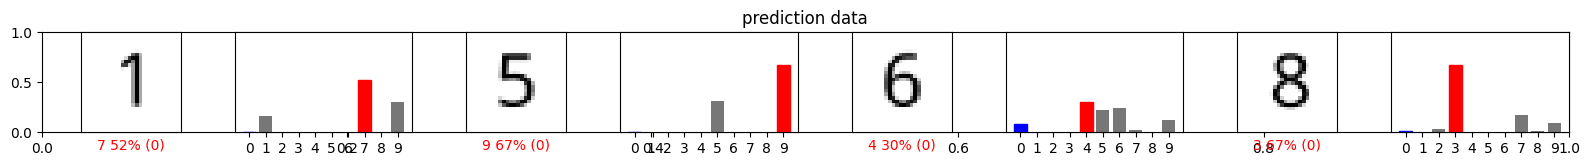

In [40]:
board_data = [target_for_tf_1, target_for_tf_5, target_for_tf_6, target_for_tf_8]
labels = [0] * 9
prediction_numbers = []

num_rows = 1
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
plt.title("prediction data")
for i in range(num_images):

    img_to_predict = np.expand_dims(board_data[i], axis=0)
    predictions_single = probability_model.predict(img_to_predict)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_single[0], labels, board_data)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_single[0], labels)

    prediction_number = np.argmax(predictions_single[0])
    prediction_numbers.append(prediction_number)

plt.tight_layout()
plt.show()

In [41]:
if prediction_numbers[0] != 1:
    raise Exception("Wrong prediction != 1")
if prediction_numbers[1] != 5:
    raise Exception("Wrong prediction != 5")
if prediction_numbers[2] != 6:
    raise Exception("Wrong prediction != 6")
if prediction_numbers[3] != 8:
    raise Exception("Wrong prediction != 8")

Exception: Wrong prediction != 1

In [ ]:
"""-------save model------"""

In [ ]:
model_version = datetime.now().strftime("%Y_%m_%d_%H_%M")

"""# The file needs to end with the .keras extension"""
model_save_path = f"{BASE_DIR}/data_sources/ml_data/trained_mnist_{model_version}.keras"

model.save(model_save_path)

In [ ]:
"""Loading the model back:"""

reconstructed_model = keras.models.load_model(model_save_path)

In [ ]:
"""Let's check:"""

np.testing.assert_allclose(
    model.predict(x_test_combo),
    reconstructed_model.predict(x_test_combo),
)

In [ ]:
"""save x_test_combo data"""

x_test_path = f"{BASE_DIR}/data_sources/ml_data/x_test_{model_version}.json"

with open(x_test_path, "w") as report_file:
    json.dump(
        obj=x_test_combo.tolist(),
        fp=report_file,
        ensure_ascii=False,
    )

In [ ]:
command_str = f"xz -k {x_test_path}"
"""-ktl -> compress with no delete + test + list info"""

subprocess.run(
    command_str.split(" "),
    capture_output=True,
    check=True,
    encoding="utf-8",
)

In [ ]:
"""----------------DONE-------------------"""